# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/methods/NonLinCFA")
from NonLinCFA import NonLinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_NonLinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

In [4]:
### Nota: devo standardizzare tutto prima di chiamare LinCFA ma non serve validare
# infatti il metodo usa i dati per stimare i pesi della regressione lineare
# anche per CMI_FS non serve validare, usa i dati per quantificare l'informazione condivisa col target

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))


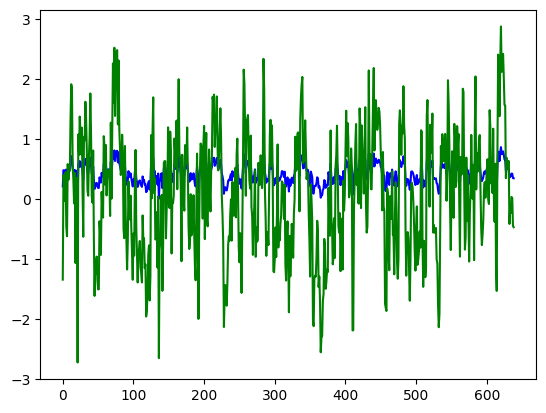

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### wrapper and CMI

Number of features: 991

Number of aggregated features: 9



selected columns: ['cyclostationary_mean_tg_8', 'cyclostationary_mean_tg_5', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_3'], 

validation score: 0.21030014319354018, 

number of selected features: 5
Full aggregate regression train score: 0.21071601094770875, test score: 0.016372840172453662
Aggregate regression train score with FS: 0.2095121149557293, test score: 0.003804323037039703
Full aggregate regression train score: 0.21071601094770875, test score: 0.016372840172453662
Aggregate regression train score with FS: 0.2095121149557293, test score: 0.003804323037039703
----- MI Scores -----
[(1, 0.12474779463214147), (4, 0.11921657479625503), (8, 0.11587843450620366), (6, 0.10979597311438616), (3, 0.10861397098174846), (5, 0.10607455002080499), (7, 0.10544432440667156), (2, 0.10402405503447891), (0, 0.10130765275799411)]
Best MI score: 0.12474779463214147
Adding first best original featu

Number of features: 991

Number of aggregated features: 30



selected columns: ['cyclostationary_mean_tg_11', 'cyclostationary_mean_tg_24', 'cyclostationary_mean_tg_6', 'cyclostationary_mean_tg_12', 'cyclostationary_mean_tg_25', 'cyclostationary_mean_tg_2', 'cyclostationary_mean_tg_28', 'cyclostationary_mean_tg_17', 'cyclostationary_mean_tg_3', 'cyclostationary_mean_tg_16', 'cyclostationary_mean_tg_8', 'cyclostationary_mean_tg_15', 'cyclostationary_mean_tg_26', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_7', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_22', 'cyclostationary_mean_tg_21'], 

validation score: 0.3202172014655663, 

number of selected features: 18
Full aggregate regression train score: 0.3002319341813299, test score: -0.07438547846068788
Aggregate regression train score with FS: 0.2904687021831328, test score: -0.022889312546962026
Full aggregate regression train score: 0.3002319341813299, test score: -0.07438547846068788
Aggregate regression train scor

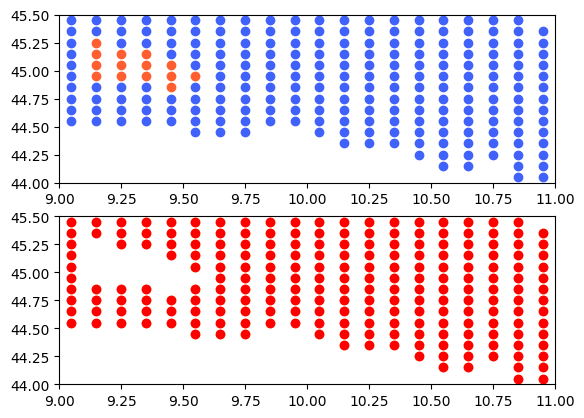

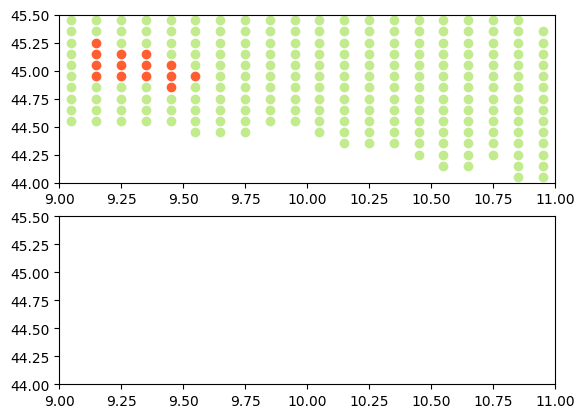

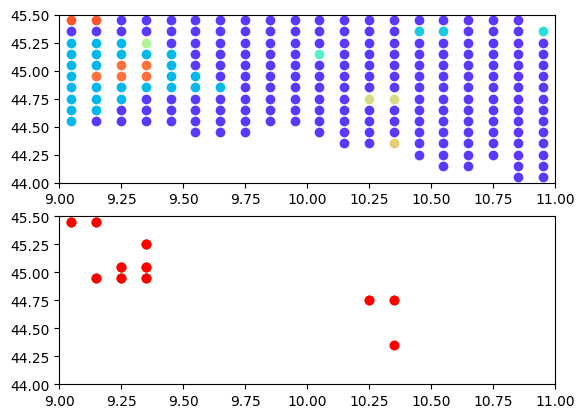

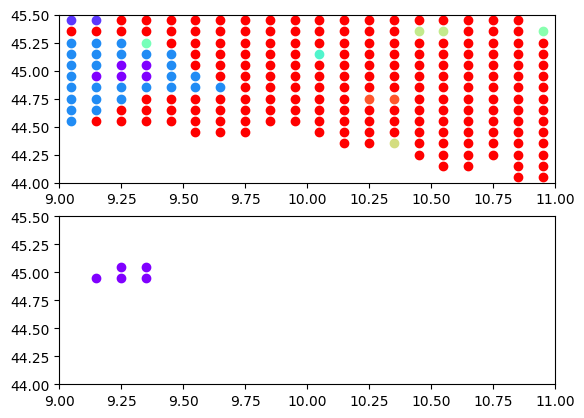

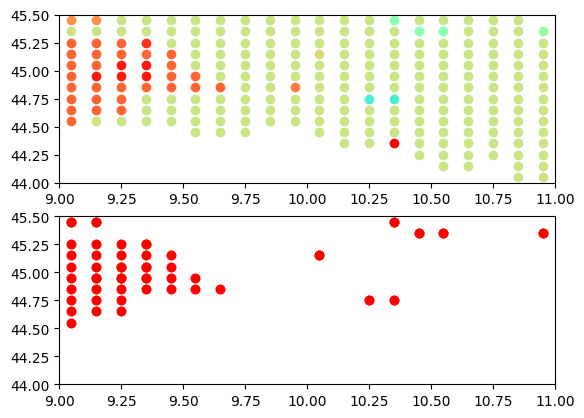

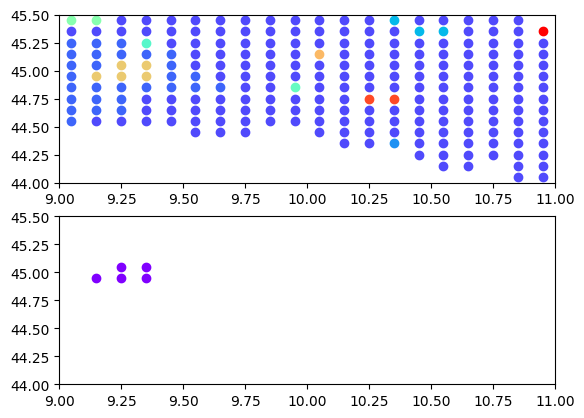

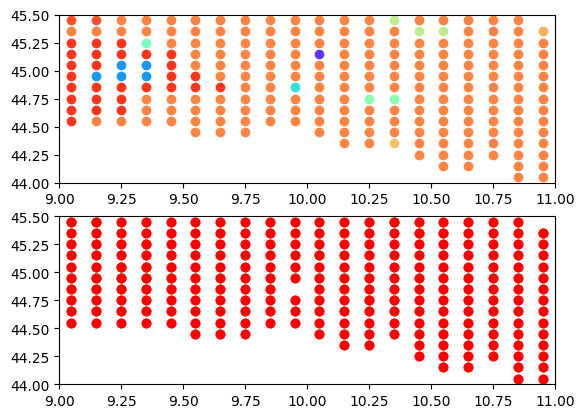

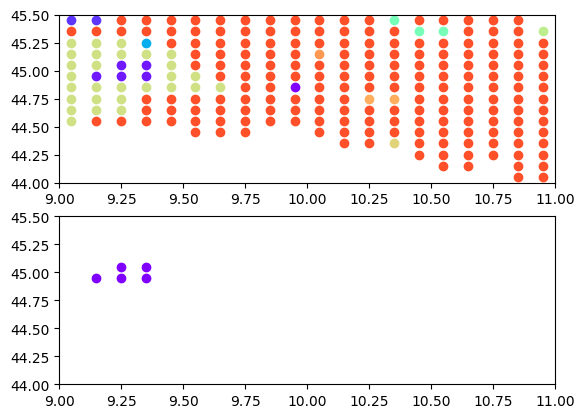

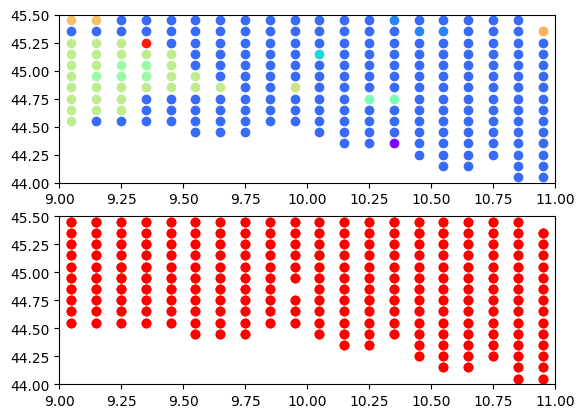

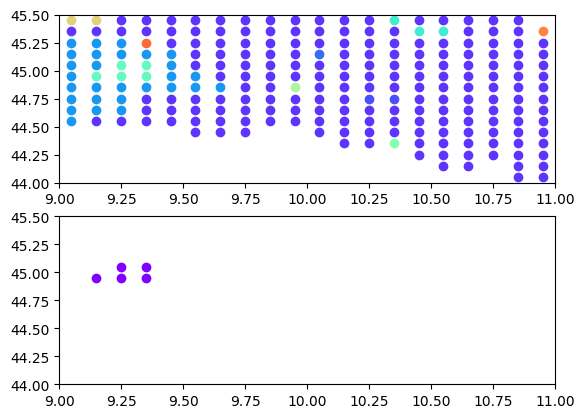

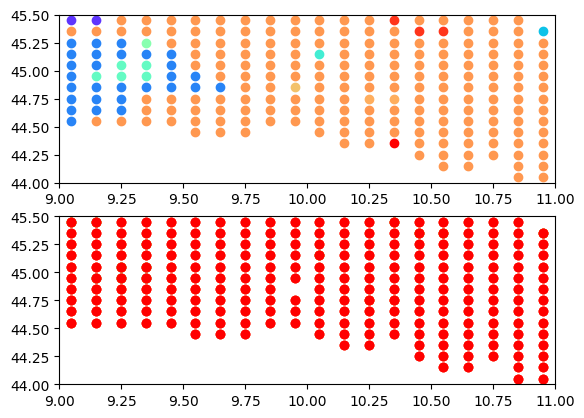

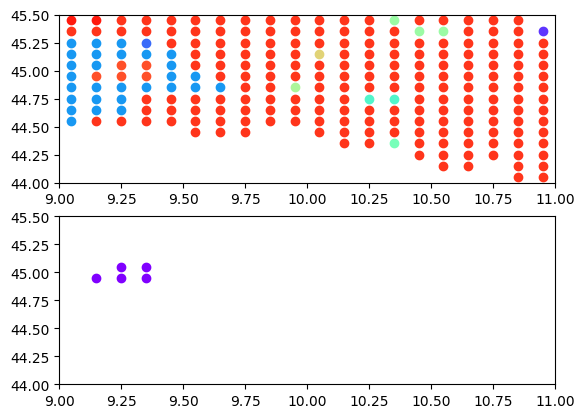

In [4]:
### what happens without considering the last years?
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    

## precipitation

### wrapper and CMI FS

Number of features: 991

Number of aggregated features: 5



selected columns: ['cyclostationary_mean_rr_0', 'cyclostationary_mean_rr_2'], 

validation score: -0.0018755357437154618, 

number of selected features: 2
Full aggregate regression train score: 0.09250496283179577, test score: -0.014489830353871858
Aggregate regression train score with FS: 0.08428341144931195, test score: -0.0307612220393636
Full aggregate regression train score: 0.09250496283179577, test score: -0.014489830353871858
Aggregate regression train score with FS: 0.08428341144931195, test score: -0.0307612220393636
----- MI Scores -----
[(4, 0.0736016155052639), (1, 0.052469755970785695), (0, 0.020444417528142918), (3, 0.014057515965166544), (2, -0.023804065878993926)]
Best MI score: 0.0736016155052639
Adding first best original feature: 4
Highest CMI score: -0.002891024654061672

[4]

Full aggregate regression train score: 0.09250496283179577, test score: -0.014489830353871858
Aggregate regression train score wit

CMI: 0.012277618028178797
CMI: 0.0048857617100270395
Highest CMI score: 0.012277618028178797
Adding original feature: 22
CMI: 0.009811339013484563
Highest CMI score: 0.009811339013484563
Adding original feature: 3
CMI: 1.3281081926344585e-05
Highest CMI score: 1.3281081926344585e-05
Adding original feature: 24
CMI: 0.000985685350707019
Highest CMI score: 0.000985685350707019
Adding original feature: 1
Highest CMI score: -0.0039855307346061825

[2, 23, 22, 3, 24, 1]

Full aggregate regression train score: 0.14453832531527333, test score: -0.04950946551957269
Aggregate regression train score with FS: 0.10538058556820251, test score: 0.027981158186578092
Full aggregate regression train score: 0.14453832531527333, test score: -0.04950946551957269
Aggregate regression train score with FS: 0.10475425744558997, test score: 0.024668532367773555
Number of features: 991

Number of aggregated features: 28



selected columns: ['cyclostationary_mean_rr_2', 'cyclostationary_mean_rr_15', 'cyclostati

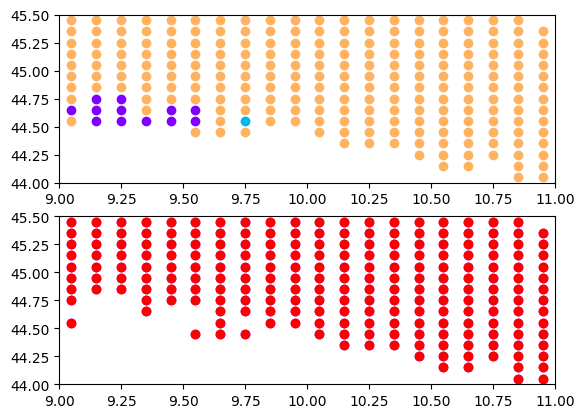

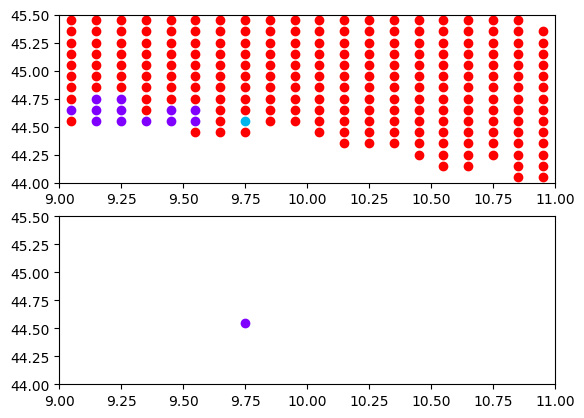

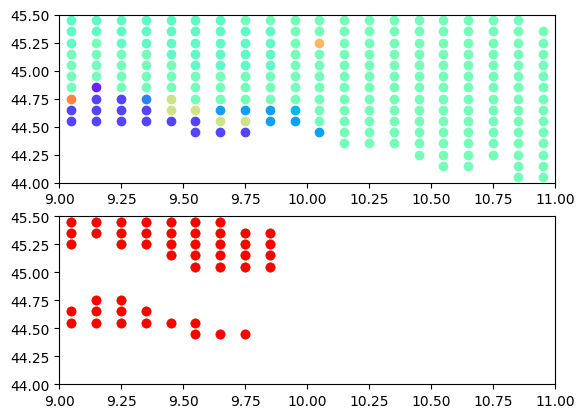

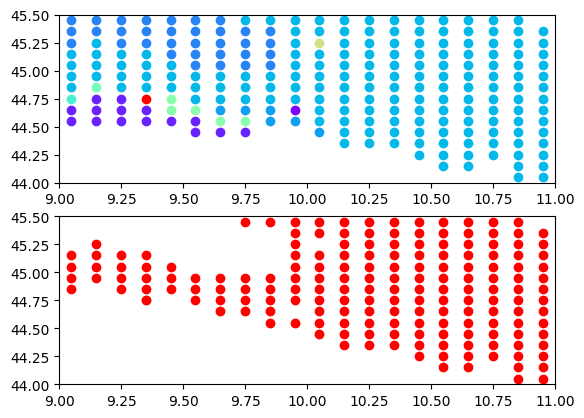

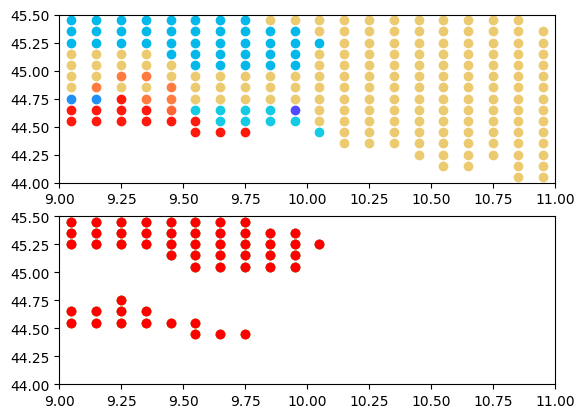

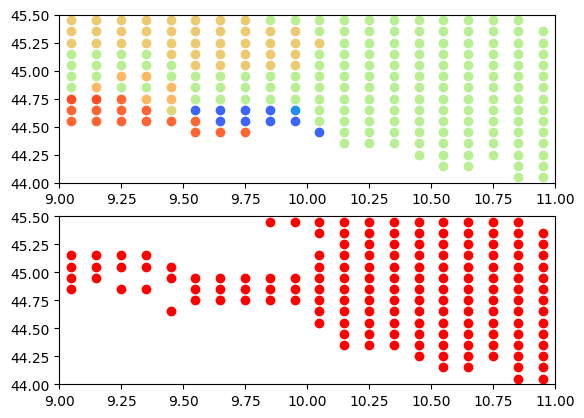

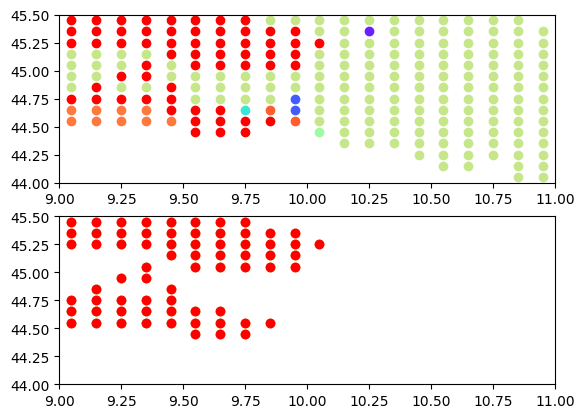

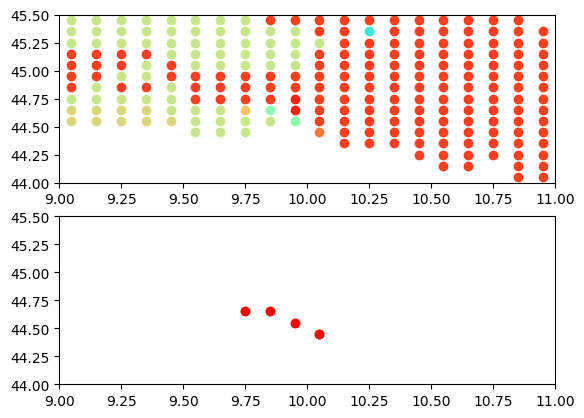

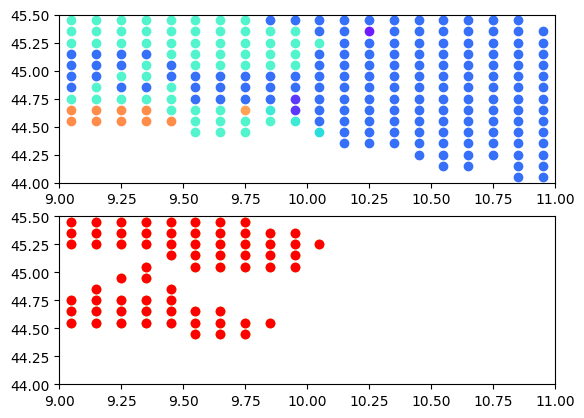

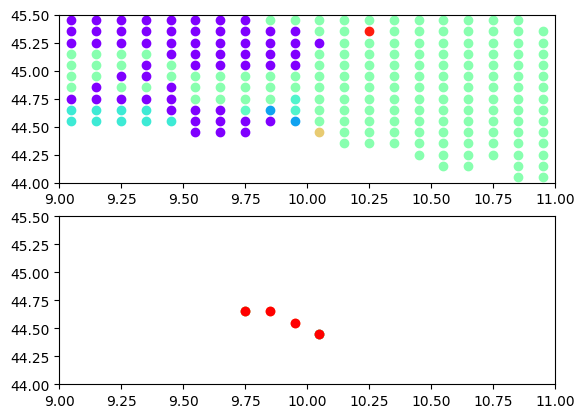

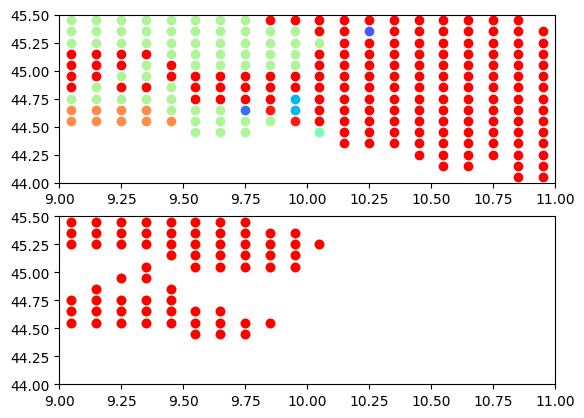

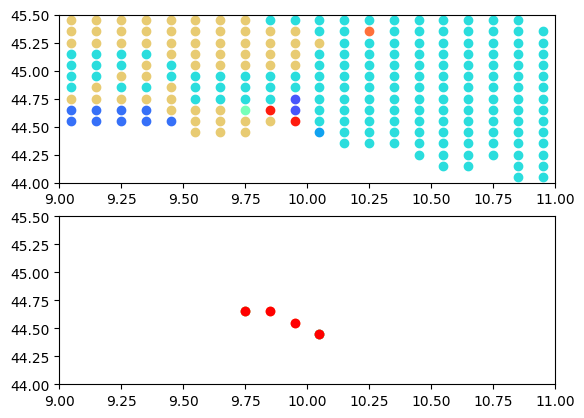

In [5]:
### what happens without considering the last years?

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5)
    

## temperature and precipitation

### wrapper and CMI FS

In [7]:
### what happens without considering the last years?
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

for eps in [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]:
    output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, eps=eps ,max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True)

    selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, min(50,len(output)-1), 228)

    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])
    
    
    ###########
    
    res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
    }
    
    res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
    selectedFeatures='selectedFeatures'
    print(f'\n{res[selectedFeatures]}\n')
    selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)
    compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

    

Number of features: 991

Number of aggregated features: 9

Number of features: 991

Number of aggregated features: 5



selected columns: ['cyclostationary_mean_tg_8', 'cyclostationary_mean_tg_5', 'cyclostationary_mean_tg_1', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_rr_3'], 

validation score: 0.213767194547838, 

number of selected features: 5
Full aggregate regression train score: 0.22962672306466525, test score: 0.013381797706194853
Aggregate regression train score with FS: 0.21272977696027695, test score: 0.014248840428266574
Full aggregate regression train score: 0.22962672306466525, test score: 0.013381797706194853
Aggregate regression train score with FS: 0.21272977696027695, test score: 0.014248840428266574
----- MI Scores -----
[(1, 0.12474779463214147), (4, 0.11921657479625503), (8, 0.11587843450620366), (6, 0.10979597311438616), (3, 0.10861397098174846), (5, 0.10607455002080499), (7, 0.10544432440667156), (2, 0.10402405503447891), (0, 0.10130765275799411), (13, 0.0

Number of features: 991

Number of aggregated features: 30

Number of features: 991

Number of aggregated features: 26



selected columns: ['cyclostationary_mean_tg_11', 'cyclostationary_mean_tg_24', 'cyclostationary_mean_tg_6', 'cyclostationary_mean_tg_12', 'cyclostationary_mean_tg_25', 'cyclostationary_mean_tg_2', 'cyclostationary_mean_rr_15', 'cyclostationary_mean_tg_26', 'cyclostationary_mean_rr_21', 'cyclostationary_mean_rr_14', 'cyclostationary_mean_tg_7', 'cyclostationary_mean_tg_3', 'cyclostationary_mean_tg_0', 'cyclostationary_mean_tg_16', 'cyclostationary_mean_tg_28', 'cyclostationary_mean_rr_4', 'cyclostationary_mean_rr_24', 'cyclostationary_mean_tg_8', 'cyclostationary_mean_tg_15', 'cyclostationary_mean_tg_17'], 

validation score: 0.32672587165351563, 

number of selected features: 20
Full aggregate regression train score: 0.33788426685828765, test score: -0.15004469853557967
Aggregate regression train score with FS: 0.28415159942435075, test score: -0.016749127137349662


----- MI Scores -----
[(11, 0.15111896825027968), (6, 0.12772475302459044), (20, 0.12586632050744742), (7, 0.11841964168780562), (22, 0.1179620082659386), (27, 0.11500091063679511), (21, 0.11487131195677998), (0, 0.11281315749256426), (10, 0.10861397098174846), (5, 0.10714108108726168), (14, 0.10613754518036286), (19, 0.10540341733359136), (16, 0.10516528639586013), (28, 0.1035645771050296), (26, 0.1024983241576036), (23, 0.09873571003838368), (8, 0.09587299663932718), (15, 0.09482621767923026), (17, 0.08964445264366126), (29, 0.08352414355797248), (3, 0.08179583029414703), (2, 0.08032286349881552), (24, 0.07821828023066929), (32, 0.07759533255122496), (12, 0.07334534739441492), (9, 0.0704396603182992), (13, 0.07035377188351921), (57, 0.06845745756320586), (31, 0.06652913246398971), (55, 0.06405548699189753), (54, 0.06277000713430393), (25, 0.06226115163554091), (1, 0.061410837160189705), (4, 0.060449483891580884), (33, 0.060303945724759375), (56, 0.04997633280479427), (18, 0.046584355